# Housing Price Analysis

## Introduction

The housing market is a big deal for many people. Buying a home is usually the most significant financial choice someone makes in their life. So, it’s important to understand what affects housing prices. This knowledge can really help buyers, sellers, and investors make better decisions.

In this analysis, I’ll take a look at a dataset containing different features of homes, like their size, location, and special amenities. My goal is to find out which factors are the most important in setting prices and to build models that can help predict those prices more accurately.


## Problem Statement

Even though we have a lot of information about housing, predicting prices accurately can be quite challenging. Several factors come into play, including the size of the home, the number of bedrooms and bathrooms, and the neighborhood. Location is usually very important , homes in popular areas tend to sell for higher prices, but understanding how much this affects the price can be complicated.

In this analysis, I’ll examine a detailed dataset of houses to tackle the problem of predicting housing prices. By using clustering techniques to group similar properties and regression models to look at how different features relate to prices, I aim to provide insights that help homebuyers and sellers make smart decisions in today’s fast-moving market.


### Dataset Overview

The dataset I’m working with contains various attributes about houses:

- **Area**: The size of the house in square feet.
- **Bedrooms**: The number of bedrooms.
- **Bathrooms**: The number of bathrooms.
- **Parking**: The number of parking spaces.
- **Stories**: The number of floors in the house.
- **Price**: The final sale price of the house, which is the target variable I want to predict.

By exploring these features and building predictive models, I hope to better understand the key drivers behind house prices and create a model that accurately estimates them.



# Student Information

- **Name**: Yajur Bhardwaj
- **Student ID**: 48682764


## Q1: What is the structure of the dataset, and are there any missing values?

In [146]:

import pandas as pd

# I have loaded the dataset from the specified housing.CSV file which I have downloaded from Kaggle.com.
df = pd.read_csv('data/Housing.csv')

# I have displayed the first few rows of the dataset to get an overview of the data.
print(df.head())

# I have printed out information about the dataset, such as the number of entries and the data types.
print("Dataset Information:")
print(df.info())

# I have generated summary statistics to understand the distribution and key metrics of the data.
print("Dataset summary statistics:")
print(df.describe())

# I have checked for any missing values in the dataset.
if df.isnull().sum().any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found in the dataset.")


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data c

## Q2: What does the distribution of house prices look like(Univariate analysis)?Also use a bar to visualise a categorical variable or a histogram for a numerical variable.

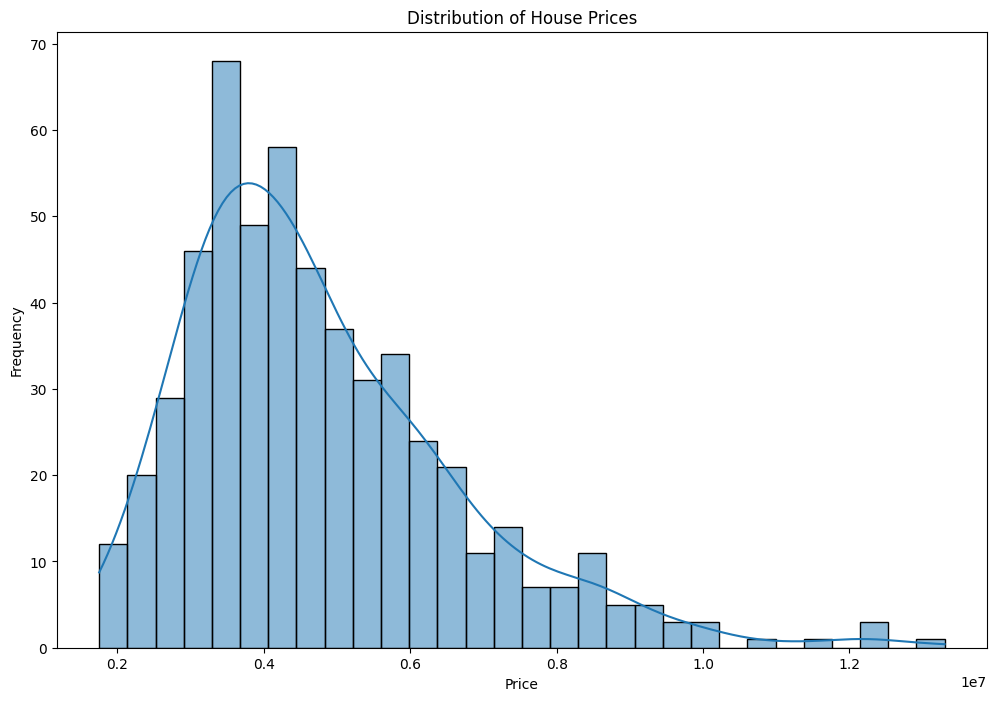

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# I want to visualize the distribution of house prices to understand how they vary across the dataset.
plt.figure(figsize=(12, 8))  # Setting the size of the figure for better visibility.

# I’m creating a histogram to see both the frequency of prices and the smooth distribution curve. 
sns.histplot(df['price'], bins=30, kde=True)

# Adding a title to my plot to give context about what I’m visualizing.
plt.title('Distribution of House Prices')

# I am Labeling the x-axis to indicate what the prices represent.
plt.xlabel('Price')

# I am Labeling the y-axis to show the frequency of each price range.
plt.ylabel('Frequency')

# Finally, I’m displaying the plot to see the results of my work.
plt.show()


## House Price Distribution

In this graph, I’m showing the distribution of house prices using a histogram with a smooth line over it to give a clear picture of how prices are spread out. Here's my simple breakdown of what the graph shows:

- On the x-axis, I’ve plotted house prices and on the y-axis, I’ve displayed the frequency (how often houses in that price range show up).
- Most of the houses are priced between 200,000 to 600,000, as you can see by the tallest bars. This tells me that the majority of homes are moderately priced.
- The curve I added shows a skew to the right. This means that while most houses are at the lower price end, there are fewer high priced homes.

  
In summary, I can see that house prices tend to cluster around the lower end, but there are a few really expensive properties pulling the curve to the right.


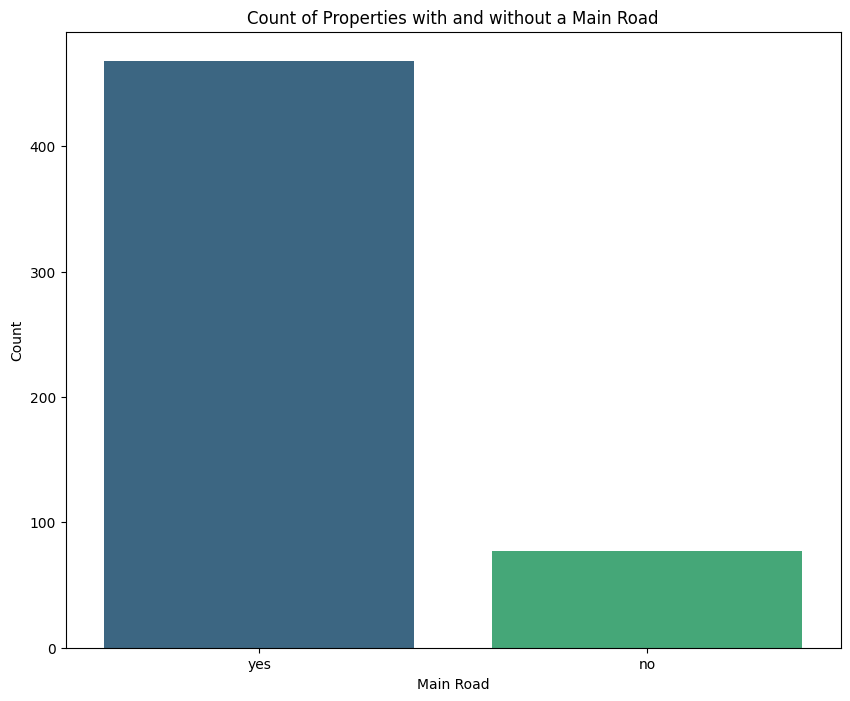

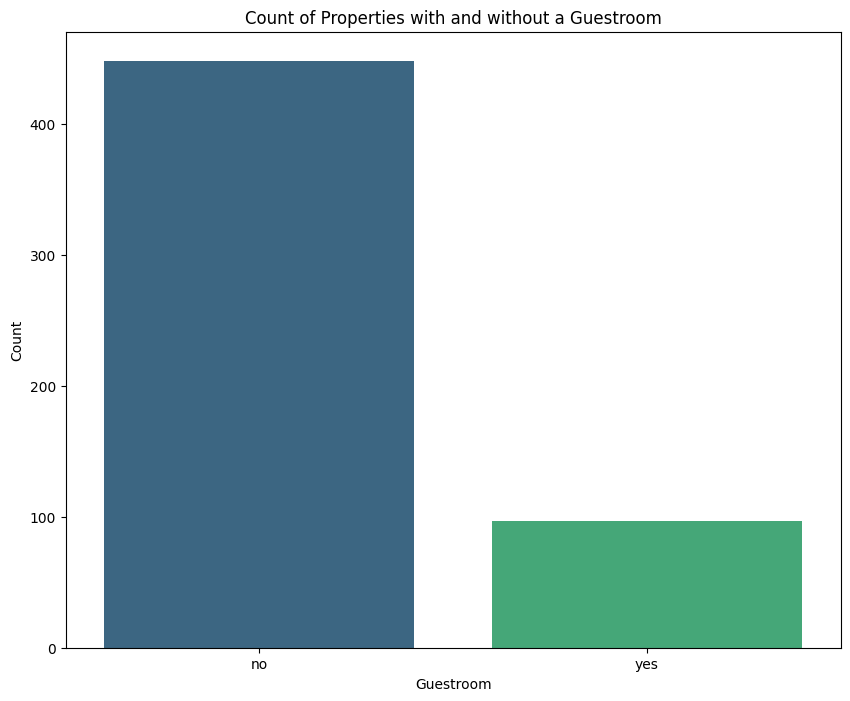

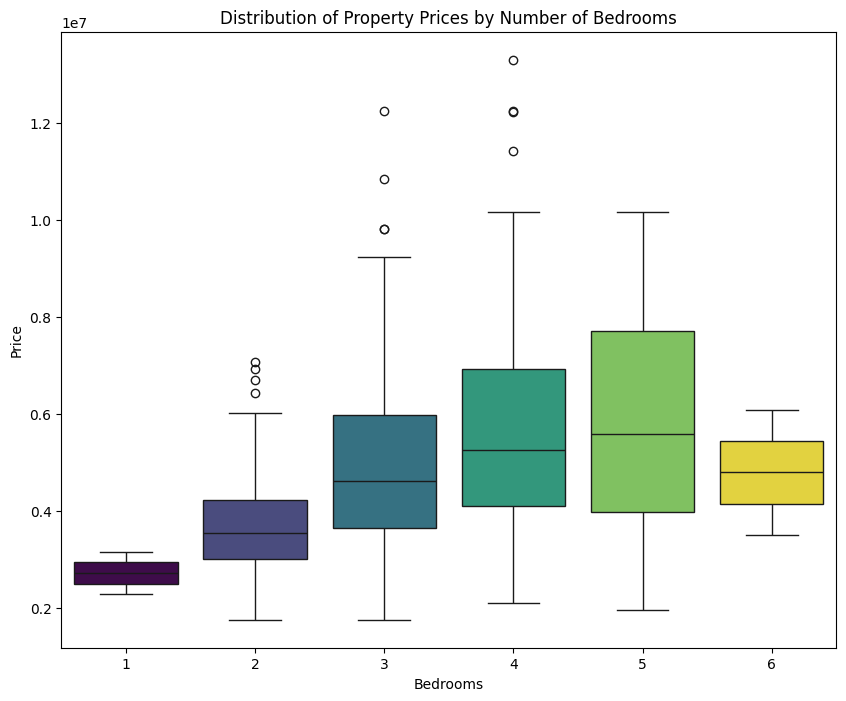

In [148]:
# I want to visualize the count of properties based on whether they are on a main road.
plt.figure(figsize=(10, 8))  # Setting the figure size for better visibility
sns.countplot(x='mainroad', data=df, hue='mainroad', palette='viridis', legend=False) 
plt.title('Count of Properties with and without a Main Road')  # Adding a title to the plot
plt.xlabel('Main Road')  # Labeling the x-axis
plt.ylabel('Count')  # Labeling the y-axis
plt.show()  # Displaying the plot

# Next, I’ll visualize the count of properties with and without a guestroom.
plt.figure(figsize=(10, 8))  # Again, setting the figure size for clarity
sns.countplot(x='guestroom', data=df, hue='guestroom', palette='viridis', legend=False)  
plt.title('Count of Properties with and without a Guestroom')  # Adding a title to the plot
plt.xlabel('Guestroom')  # Labeling the x-axis
plt.ylabel('Count')  # Labeling the y-axis
plt.show()  # Displaying the plot

# I want to use a box plot to compare property prices based on the number of bedrooms.
plt.figure(figsize=(10, 8))  # Setting the figure size
sns.boxplot(x='bedrooms', y='price', data=df, palette='viridis', hue='bedrooms', legend=False) 
plt.title('Distribution of Property Prices by Number of Bedrooms')  # Adding a title to the plot
plt.xlabel('Bedrooms')  # Labeling the x-axis
plt.ylabel('Price')  # Labeling the y-axis
plt.show()  # Displaying the plot




## Q3: How does the area of a house relate to its price?(Bivariate analysis)


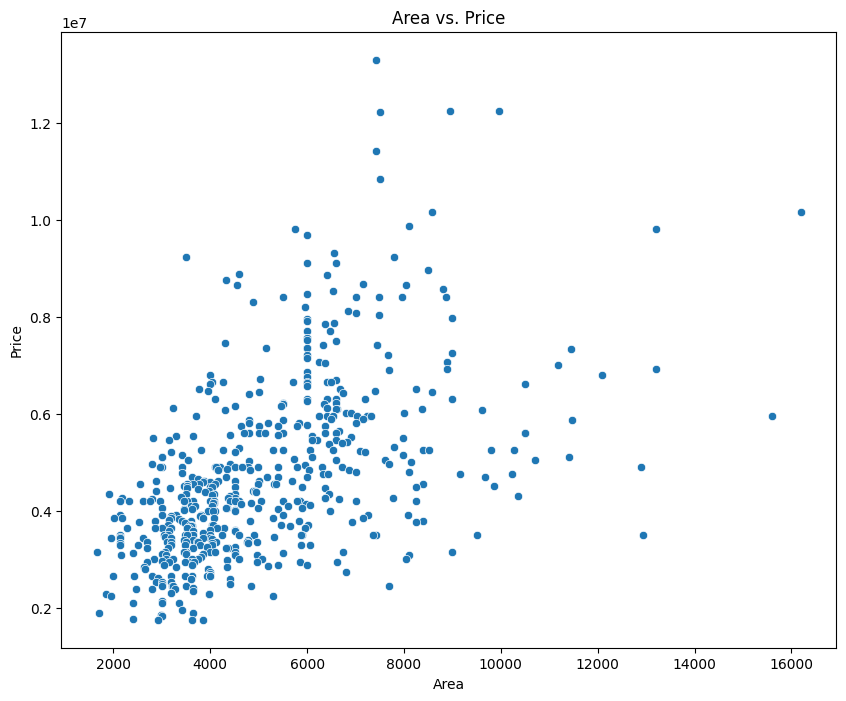

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Here I explore the relationship between area and price using a scatter plot.
plt.figure(figsize=(10, 8))  # Setting the figure size for clarity and better visualization.

# Here, I'm plotting the area against the price to see if there's any noticeable trend or pattern.
sns.scatterplot(data=df, x='area', y='price')

# Adding a title to the plot.
plt.title('Area vs. Price')

# Labeling the x-axis as area.
plt.xlabel('Area')

# Labeling the y-axis as prices.
plt.ylabel('Price')

# Now, I'll display the plot to visualize the relationship between area and price.
plt.show()


## Relationship Between House Area and Price

In this scatter plot, I’m exploring how the area of a house relates to its price:

- The x-axis represents the area of the house , while the y-axis shows the price .
- I noticed a general positive trend: as the area of the house increases, the price tends to go up. This makes sense—larger homes usually have higher prices.
- However, there’s quite a bit of variation. While bigger houses are generally more expensive, I see some small houses that cost a lot and some large houses that are priced lower than expected.
- There are a few outliers on the graph—houses with very high prices (above 10 million) and very large areas (above 12,000 square feet), but these cases are rare.

In summary, bigger houses do tend to cost more, but the relationship between size and price isn’t perfect. The housing market shows a lot of diversity. 


## Q4: How do we encode categorical variables for our analysis?


In [150]:
from sklearn.preprocessing import OneHotEncoder

# First, I'm creating a DataFrame from the data I've gathered.

df = pd.read_csv('data/Housing.csv')

# I've identified the categorical columns that I want to encode. 
# This will help the model understand these features better.
categorical_columns = ['mainroad', 'guestroom', 'basement', 
                       'hotwaterheating', 'airconditioning', 
                       'prefarea', 'furnishingstatus'] 

# Now, I'm applying one-hot encoding to these categorical columns.
# This transforms the categorical variables into a format that can be easily used later on for analysis.
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# After encoding, I'll ensure that all the data in the DataFrame is of type integer.
df_encoded = df_encoded.astype(int)

# Finally, I'm printing the first few rows of the encoded DataFrame to check if everything looks good.
print(df_encoded.head())




      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2             1   
1  12250000  8960         4          4        4        3             1   
2  12250000  9960         3          2        2        2             1   
3  12215000  7500         4          2        2        3             1   
4  11410000  7420         4          1        2        2             1   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0             0                    0                    1   
1              0             0                    0                    1   
2              0             1                    0                    0   
3              0             1                    0                    1   
4              1             1                    0                    1   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0             1  

## Q5: Can we identify clusters of similar houses based on their features?

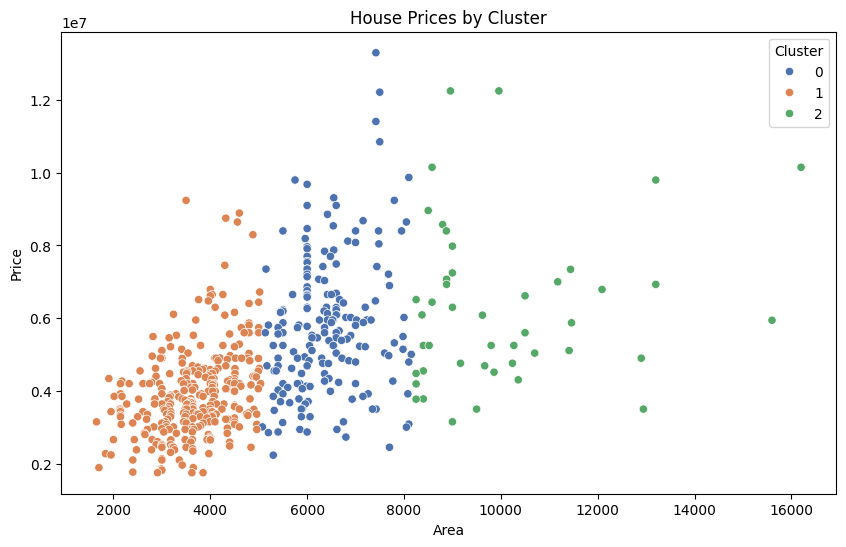

In [151]:
# I'm defining the features that I'll use for clustering.
# Here, I'm selecting the 'area', 'bedrooms', and 'bathrooms' columns from the encoded DataFrame.
X_clustering = df_encoded[['area', 'bedrooms', 'bathrooms']]  

# Next, I’ll apply KMeans clustering to group the data into 3 distinct clusters.
# I've set a random state as my student ID, so I can get the same clusters every time I run this.
kmeans = KMeans(n_clusters=3, random_state=48682764)
df_encoded['cluster'] = kmeans.fit_predict(X_clustering)

# Now I will visualize the clusters I've created.
# I'll create a scatter plot to show how the clusters relate to house prices.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', hue='cluster', data=df_encoded, palette='deep')
plt.title('House Prices by Cluster')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()







## House Prices vs. House Areas (Clustered)

This scatter plot gives me a great visual of house prices compared to house areas, with data points split into three distinct clusters. Here's how I’d explain it:

- **Cluster 0 (blue dots):** These represent houses in the middle range for both size and price. Most of them fall between 4,000 to 8,000 square feet, with prices ranging from about 0.4 to 1 million.
- **Cluster 1 (orange dots):** This cluster is for smaller, more affordable homes. These houses tend to be between 2,000 and 5,000 square feet, with prices below 0.6 million.
- **Cluster 2 (green dots):** These dots show the biggest, most expensive homes. Houses in this group are usually larger than 8,000 square feet and priced over 0.6 million, with a few even exceeding 1 million.

In summary, I see a clear pattern in the plot: smaller, cheaper homes are grouped in the orange cluster, mid-range homes are in the blue cluster, and the largest, priciest homes make up the green cluster.


### Q6: What are the best features for predicting house prices within each cluster?

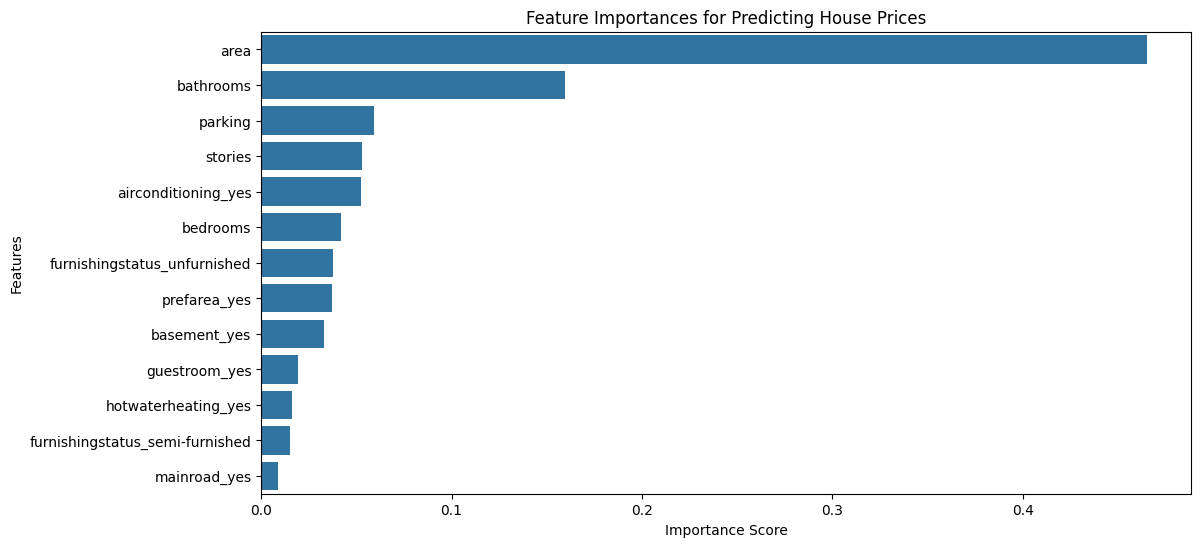


Best Features for Cluster 0:
                            Feature  Importance
2                         bathrooms    0.273304
0                              area    0.199303
9               airconditioning_yes    0.103507
4                           parking    0.086527
3                           stories    0.085944
10                     prefarea_yes    0.075132
1                          bedrooms    0.056440
7                      basement_yes    0.039544
6                     guestroom_yes    0.031214
12     furnishingstatus_unfurnished    0.017761
11  furnishingstatus_semi-furnished    0.016307
5                      mainroad_yes    0.010726
8               hotwaterheating_yes    0.004291

Best Features for Cluster 2:
                            Feature  Importance
2                         bathrooms    0.346178
0                              area    0.172984
4                           parking    0.106396
9               airconditioning_yes    0.083811
3                           

In [152]:
# First, I want to separate my features from the target variable. 
# I'll drop the 'price' and 'cluster' columns from my DataFrame to get my features.
X = df_encoded.drop(columns=['price', 'cluster'])  
# Now, I'll define my target variable, which is the price of the houses.
y = df_encoded['price']

# I'm going to fit a Random Forest model to help me understand which features are most important for predicting house prices.
rf = RandomForestRegressor(random_state=48682764)  # Setting a random state (Here I have used my Student Id-48682764)
rf.fit(X, y)  # Fitting the model with my features and target variable

# Next, I'll extract the feature importances from the fitted model. 
importances = rf.feature_importances_

# To make it easier to analyze, I'll create a DataFrame that contains the features and their corresponding importance scores.
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
# Now, I'll sort this DataFrame by the importance scores in descending order so that I can quickly see which features matter the most.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# To  visualize the feature importances using a bar plot to get a clearer picture.
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances for Predicting House Prices')  # Giving my plot a title
plt.xlabel('Importance Score')  # Labeling the x-axis
plt.ylabel('Features')  # Labeling the y-axis
plt.show()  # Displaying the plot

# To check the best features for predicting house prices within each cluster.
for cluster in df_encoded['cluster'].unique(): 
    print(f"\nBest Features for Cluster {cluster}:") 
    
    # I'll filter the DataFrame to only include rows from the current cluster I'm analyzing.
    cluster_data = df_encoded[df_encoded['cluster'] == cluster]
    
    # Now, I'll fit another Random Forest model specifically for this cluster to find out the feature importances.
    rf_cluster = RandomForestRegressor(random_state=48682764)  # Again, setting a random state for consistency
    rf_cluster.fit(cluster_data.drop(columns=['price', 'cluster']), cluster_data['price'])
    
    # I'll get the feature importances for the current cluster's model.
    importances_cluster = rf_cluster.feature_importances_
    # Creating a new DataFrame for the current cluster's features and their importance scores.
    cluster_importance_df = pd.DataFrame({'Feature': cluster_data.drop(columns=['price', 'cluster']).columns,
                                           'Importance': importances_cluster})
    # Sorting the cluster feature importances in descending order for easier interpretation.
    cluster_importance_df = cluster_importance_df.sort_values(by='Importance', ascending=False)
    
    # Finally, I’ll print out the feature importances for the current cluster.
    print(cluster_importance_df)



## Feature Importance for Predicting House Prices

This bar chart helps me see how different features impact house prices. Here's how I break it down:

- **Area** stands out as the most important feature when predicting house prices. Simply put, the bigger the house, the more it affects the price, and it has the largest importance score by far.
- The next most influential feature is **the number of bathrooms**, followed by **parking availability**, and then **the number of stories** in the house. These factors do matter, but they're much less important compared to the area.
- Other features like **air conditioning**, **bedrooms**, and whether the house is **unfurnished** also have an effect but are less impactful.
- Features such as **having a guestroom**, **hot water heating**, or whether the house is on **the main road** seem to have the least influence on the price.

In summary, the **house size (area)** is the key factor in determining its price, while features like **bathrooms** and **parking** play a role but are less significant. Features like **guest rooms** or **main road access** have the smallest impact.


## Proceeding with linear regression for making predictions.

In [119]:
# I am checking each unique cluster in my dataset to see how well a linear regression model can predict house prices within each segments.
for cluster in df_encoded['cluster'].unique():
    print(f"\nLinear Regression for Cluster {cluster}:")  # Letting myself know which cluster I'm analyzing

    # Here, I'm filtering the data to focus mainly on the current cluster
    cluster_data = df_encoded[df_encoded['cluster'] == cluster]

    # Now, I need to define my features and target variable for the model.
    # I'm excluding the 'price' and 'cluster' columns from the features.
    X = cluster_data.drop(columns=['price', 'cluster'])  # These are the inputs for my model
    y = cluster_data['price']  # This is the output I'm trying to predict

    # To fit a Linear Regression model to my data
    lr = LinearRegression()  # I'm creating a variable for the Linear Regression model
    lr.fit(X, y)  # Fitting the model using the current cluster's data

    # Now that my model is trained, I can make predictions .
    y_pred = lr.predict(X)  # I'm predicting house prices based on the features

    # To understand how well my model is performing, I'll calculate some key metrics.
    mse = mean_squared_error(y, y_pred)  # This tells me the average squared error
    mae = mean_absolute_error(y, y_pred)  # This measures the average absolute error
    r2 = r2_score(y, y_pred)  # The R² score helps me see how much of the variability in prices my model explains.

    # To print the final results for the model metrics
    print(f"Coefficients: {lr.coef_}")  # These coefficients show the impact of each feature
    print(f"Intercept: {lr.intercept_}")  # The intercept gives me a baseline prediction
    print(f"Mean Squared Error (MSE): {mse}")  # I'm checking the MSE to assess prediction accuracy
    print(f"Mean Absolute Error (MAE): {mae}")  # MAE helps me to understand the average error in predictions
    print(f"R² Score: {r2}")  # Finally, the R² score tells me how well my model fits the data



Linear Regression for Cluster 0:
Coefficients: [ 3.58708067e+02  2.84978004e+05  1.18973639e+06  4.69607685e+05
  4.65069453e+05  9.13852814e+05  1.65158213e+05  3.80209906e+05
  7.28266633e+05  9.48693612e+05  7.92716562e+05 -7.99919945e+04
 -2.19089738e+05]
Intercept: -2178710.706208041
Mean Squared Error (MSE): 1229400213856.36
Mean Absolute Error (MAE): 820993.3888969478
R² Score: 0.6605508158170892

Linear Regression for Cluster 2:
Coefficients: [ 2.25926459e+02 -1.67742800e+05  1.72335484e+06  5.97466857e+05
 -6.54524689e+04  6.40284270e-10 -1.75621860e+06  1.10993026e+06
  7.43102137e+05  9.08198294e+05  5.72055332e+05  4.46761903e+05
 -5.39763971e+05]
Intercept: 174854.71721253078
Mean Squared Error (MSE): 1505654380371.6938
Mean Absolute Error (MAE): 907822.7760948791
R² Score: 0.6714964028772721

Linear Regression for Cluster 1:
Coefficients: [ 4.30685701e+02  1.63840472e+05  4.96480986e+05  3.11232748e+05
  1.66519550e+05  3.09048339e+05  5.79821044e+05  2.83101960e+05
  8.

# Linear Regression Analysis of House Prices by Cluster

In my analysis of house prices, I applied linear regression to three distinct clusters, each showing unique characteristics. Here’s a breakdown of the findings for each cluster:

## Cluster 0

- **Coefficients**: [ 3.58708067e+02  2.84978004e+05  1.18973639e+06  4.69607685e+05
  4.65069453e+05  9.13852814e+05  1.65158213e+05  3.80209906e+05
  7.28266633e+05  9.48693612e+05  7.92716562e+05 -7.99919945e+04
 -2.19089738e+05] 
  `
- **Intercept**: -2178710.706208041
- **Mean Squared Error (MSE)**: 1229400213856.36
- **Mean Absolute Error (MAE)**: ` 820993.3888969478
- **R² Score**:  0.6605508158170892

In Cluster 0, the model has a relatively decent R² score of **0.66**, indicating that about **66%** of the variance in house prices can be explained by the features. The high coefficients for certain features suggest they have a strong influence on the predicted prices. However, the **MSE** and **MAE** values show there's still significant room for improvement in prediction accuracy. The negative intercept indicates that if all features were zero, the predicted price would be negative, which isn't true in reality.

---

## Cluster 1

- **Coefficients**:   [ 4.30685701e+02  1.63840472e+05  4.96480986e+05  3.11232748e+05
  1.66519550e+05  3.09048339e+05  5.79821044e+05  2.83101960e+05
  8.70523427e+05  5.62667094e+05  4.43914026e+05 -7.03322089e+03
 -5.44250212e+05]
  
- **Intercept**: 279544.33546041185
- **Mean Squared Error (MSE)**: `696498840108.5836
- **Mean Absolute Error (MAE)**: ` 620858.7679392752
- **R² Score**: 0.5386374894719537`

Cluster 1 presents a lower R² score of **0.54**, meaning that just over half of the variability in house prices is captured by the model. This suggests the presence of additional influencing factors not accounted for in the features used. The coefficients indicate that some features, like area and number of bathrooms, are positively correlated with price, reflecting  that larger homes with more amenities are generally more expensive. The model’s **MSE** and **MAE** scores show better predictive performance than Cluster 0, yet there is still important error in the price predictions.

---

## Cluster 2

- **Coefficients**:  [ 2.25926459e+02 -1.67742800e+05  1.72335484e+06  5.97466857e+05
 -6.54524689e+04  6.40284270e-10 -1.75621860e+06  1.10993026e+06
  7.43102137e+05  9.08198294e+05  5.72055332e+05  4.46761903e+05
 -5.39763971e+05]
  
- **Intercept**:  174854.71721253078
- **Mean Squared Error (MSE)**: 1505654380371.6938
- **Mean Absolute Error (MAE)**: 907822.7760948791
- **R² Score**:  0.6714964028772721

In Cluster 2, the R² score increases slightly to **0.67**, suggesting that the model explains a good size of the price variability. However, the presence of both positive and negative coefficients indicates mixed influences of various features, with some of them driving prices down. The high **MSE** and **MAE** values reflect challenges in accurate price predictions, similar to what I found in Cluster 0. The model indicates that certain amenities, like air conditioning and furnishing status, play an important role in pricing dynamics.

---

## Conclusion

Overall, my analysis of house prices across different clusters using linear regression indicates that while some features strongly influence prices, the model still faces problems in achieving high accuracy. The differences in performance metrics across clusters suggest a need for tailored approaches or additional features to enhance predictive capabilities. The information gained here can guide further exploration and refinement of the model for better price predictions in the housing market.



## Predicting prices and plotting the predictions

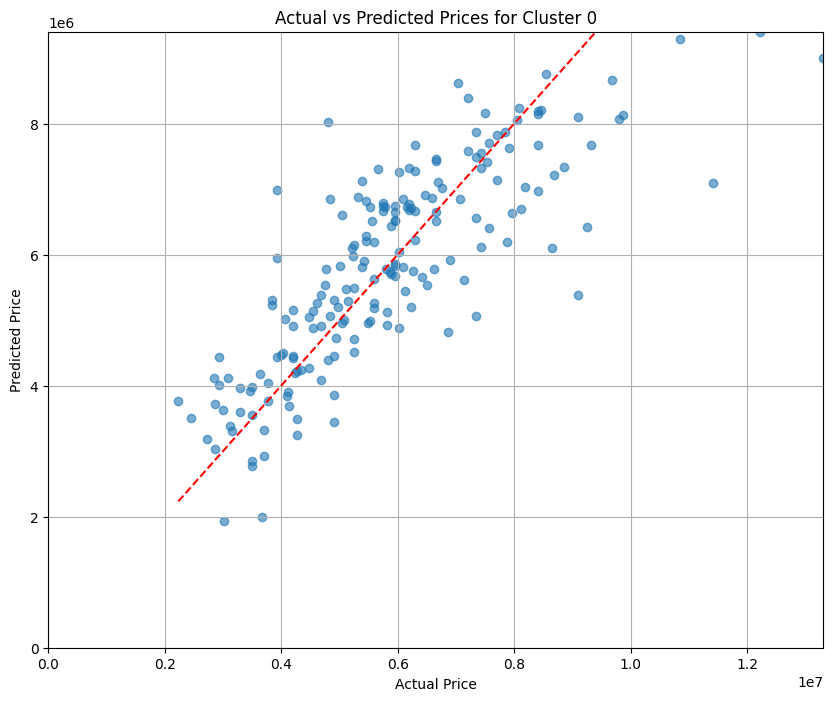

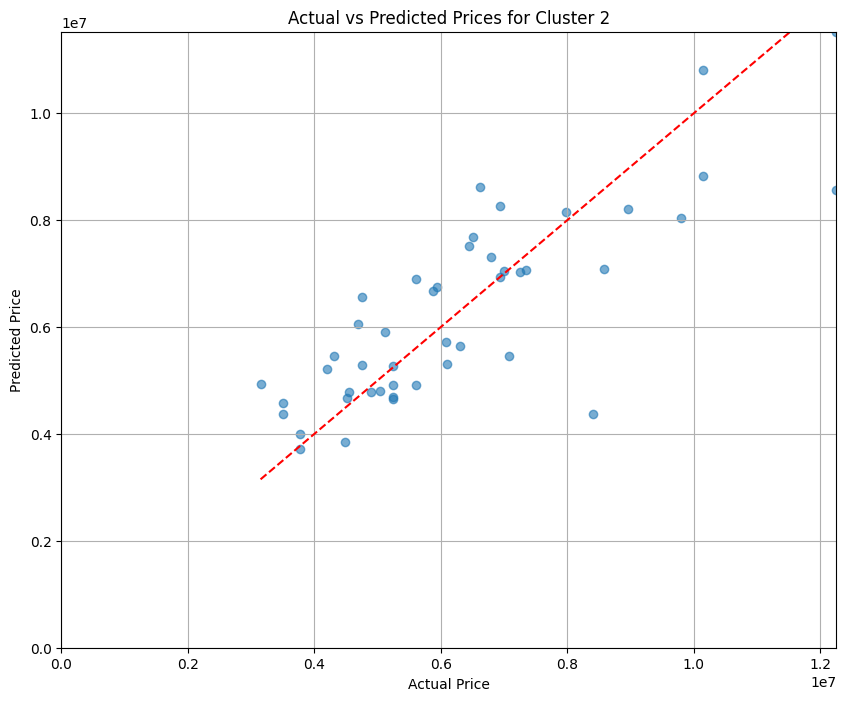

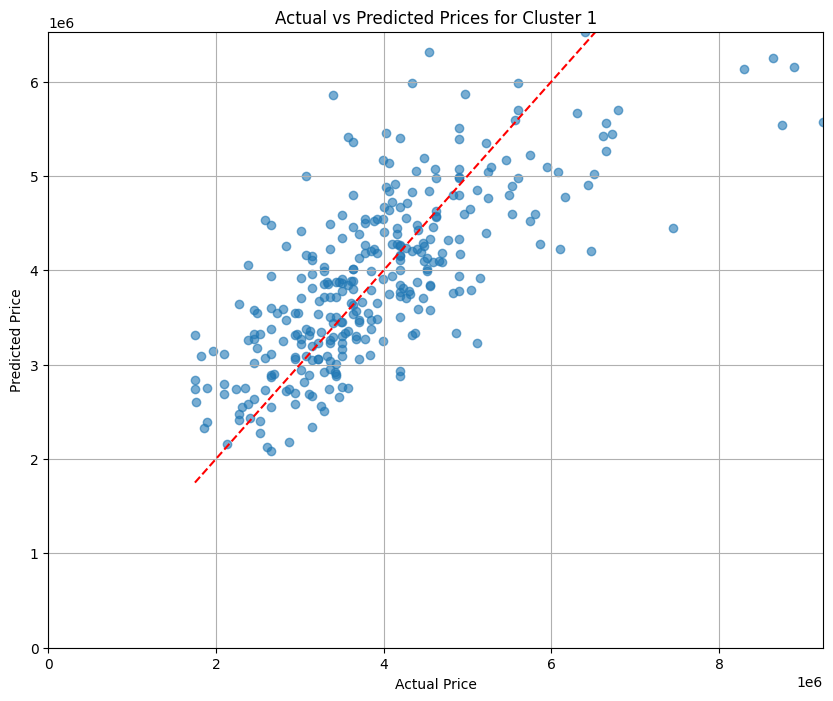

In [153]:
# First, I got the unique clusters from the encoded DataFrame.
clusters = df_encoded['cluster'].unique()

# I created an empty dictionary to hold predictions for each cluster.
predictions = {}  

# Now, I will go through each cluster to make predictions and create plots.
for cluster in clusters:
    # I filtered the DataFrame to get data just for the current cluster.
    # I made a copy of the data to avoid warnings later(I was getting before)
    cluster_data = df_encoded[df_encoded['cluster'] == cluster].copy()  
    
    # Next, I prepared the features by dropping the 'price' and 'cluster' columns.
    X_cluster = cluster_data.drop(columns=['price', 'cluster'])
    
    # Now, I will fit a linear regression model using these features.
    lr = LinearRegression()
    lr.fit(X_cluster, cluster_data['price'])
    
    # After training the model, I predicted the house prices for this cluster.
    # I added these predictions to the DataFrame.
    cluster_data.loc[:, 'predicted_price'] = lr.predict(X_cluster)  
    
    # I saved the actual prices and predicted prices in the predictions dictionary.
    predictions[cluster] = cluster_data[['price', 'predicted_price']]
    
    # Now, I’ll create a scatter plot to show how actual prices compare to predicted prices for this cluster.
    plt.figure(figsize=(10, 8))
    plt.scatter(cluster_data['price'], cluster_data['predicted_price'], alpha=0.6)
    
    # I added a red dashed line to show where the actual price equals the predicted price.
    plt.plot([cluster_data['price'].min(), cluster_data['price'].max()], 
             [cluster_data['price'].min(), cluster_data['price'].max()], 
             'r--')  # This line is a guide for perfect predictions.
    
    # I set titles and labels to make my plot clear.
    plt.title(f'Actual vs Predicted Prices for Cluster {cluster}')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    
    # I adjusted the limits on the axes to fit the data nicely.
    plt.xlim(0, cluster_data['price'].max())
    plt.ylim(0, cluster_data['predicted_price'].max())
    
    # Finally, I turned on the grid for better visibility and showed the plot.
    plt.grid(True)
    plt.show()


## Model Predictions vs. Actual House Prices by Cluster

When I look at these scatter plots, I can see how well the model's predictions match the actual house prices across different clusters. Here's what stands out to me:

- **Cluster 0**: 
  - Most points are fairly close to the red dashed line, which represents perfect predictions. This tells me that the model did an okay job here.
  - However, as the actual prices increase, the predicted prices seem to lag behind a bit. It's not a perfect match, but it's not too far off either.
  
- **Cluster 2**: 
  - The predictions look more accurate here, with many points lining up near the red line. This is exactly what I’d expect for a well-performing model.
  - That said, when actual prices get really high, the model tends to underestimate them. So, while mostly accurate, the predictions are lower than they should be for expensive houses.
  
- **Cluster 1**: 
  - This cluster feels more scattered, with predictions being all over the place. A lot of points are either way above or way below the red line, showing that the model struggled more here.
  - Especially for mid-range houses, the model either overestimated or underestimated prices, which shows inconsistency in its performance.

### Summary:
The model did a decent job for some clusters, particularly **Cluster 2**, but there’s definitely room for improvement especially for **more expensive homes** and in **Cluster 1**, where predictions are less reliable.

## Q7 How can you enhance the performance of a linear regression model for predicting house prices by using polynomial regression and Recursive Feature Elimination (RFE)?

In [154]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE

# I have defined the features and target variable
X = df_encoded.drop(columns=['price', 'cluster'])  # I exclude price and cluster columns as I did in linear regression model
y = df_encoded['price']

#  I have created polynomial features
poly = PolynomialFeatures(degree=2)  
X_poly = poly.fit_transform(X)

# I have fitted a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# I have used RFE to select important features
selector_features = RFE(estimator=model, n_features_to_select=10)  # I select the top 10 features
selector_features = selector_features.fit(X_poly, y)

# I get the support and ranking of features
selected_features = poly.get_feature_names_out(X.columns)[selector_features.support_]
print(f"Selected Features: {selected_features}")

# I will fit a new model using only the selected features
X_selected = X_poly[:, selector_features.support_]  # I will get only the selected polynomial features
model_final = LinearRegression()
model_final.fit(X_selected, y)

#  I will make predictions and evaluate the model
y_pred = model_final.predict(X_selected)

# I  have calculated evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# I print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")







Selected Features: ['guestroom_yes' 'basement_yes' 'hotwaterheating_yes'
 'airconditioning_yes' 'prefarea_yes' 'guestroom_yes^2' 'basement_yes^2'
 'hotwaterheating_yes^2' 'airconditioning_yes^2' 'prefarea_yes^2']
Mean Squared Error (MSE): 2700651429475.591
Mean Absolute Error (MAE): 1206183.8276239373
R² Score: 0.22664525954944825



## Feature Selection and Rankings from Polynomial Regression

### Selected Features
After using Recursive Feature Elimination (RFE) on our polynomial regression model, I found the following features that are important for predicting house prices:

- **Guestroom (guestroom_yes)**
- **Basement (basement_yes)**
- **Hot Water Heating (hotwaterheating_yes)**
- **Air Conditioning (airconditioning_yes)**
- **Preferred Area (prefarea_yes)**
- **Guestroom (Squared) (guestroom_yes^2)**
- **Basement (Squared) (basement_yes^2)**
- **Hot Water Heating (Squared) (hotwaterheating_yes^2)**
- **Air Conditioning (Squared) (airconditioning_yes^2)**
- **Preferred Area (Squared) (prefarea_yes^2)**

These features show that having a guestroom, basement, and hot water heating really matters when it comes to house prices. The squared terms suggest that their effects are a bit more complicated than they might seem at first.

### Feature Rankings
Looking at the rankings of all the features, I noticed some interesting trends:

#### Top Features:
- **Guestroom, Basement, and Hot Water Heating**: These features rank high, indicating they're very important for pricing houses.
- **Squared Terms**: Features like basement_yes^2 also rank well, suggesting their impact isn’t just straightforward.

#### Lower-Ranked Features:
- Some features, like area^2, didn't make the final list, which implies they might not be as significant for pricing compared to the features we've selected.

#### Overall Importance:
- While things like being close to a main road or the type of furnishings still matter, they seem to be less influential than the features we chose.

### Conclusion
This analysis highlights that features related to the house itself, like having a guestroom or basement, play a big role in determining prices. However, their relationships to price can be more complex than they initially appear.





## Q8 : How can you evaluate the performance of a KNN regression model by analyzing the impact of different values for the number of neighbors (k) on metrics such as Mean Squared Error, Mean Absolute Error, and R² Score? 


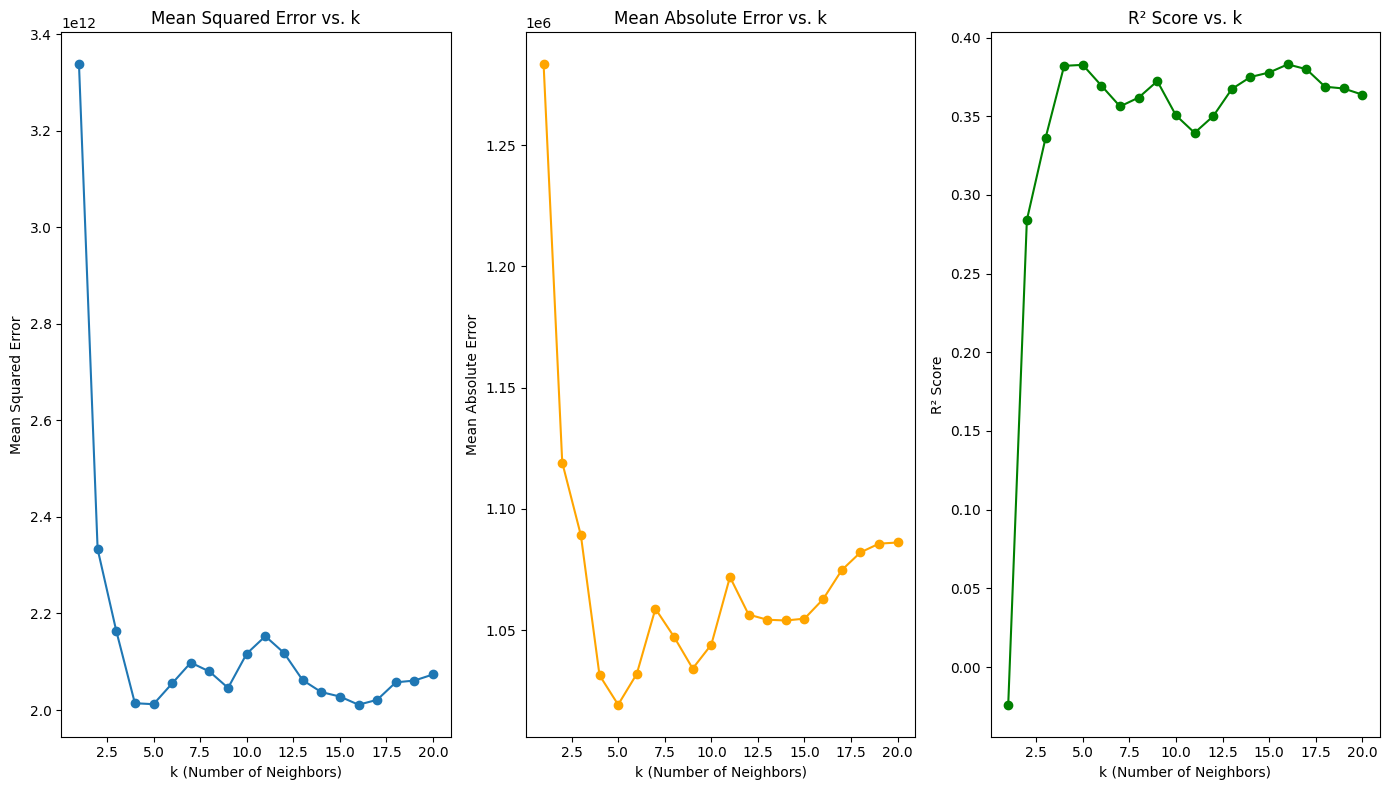

The best k based on R² score is: 16


In [158]:

X = df_encoded.drop(columns=['price', 'cluster'])  # I separate the features from the target variable.
y = df_encoded['price']  # This is my target variable, the price of the houses.

# I split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48682764)

# I define a range for k, which is the number of neighbors in KNN. 
k_values = range(1, 21)  # I want to test k from 1 to 20.
mse_values = []  # I will store the Mean Squared Error for each k.
mae_values = []  # I will store the Mean Absolute Error for each k.
r2_values = []  # I will store the R² Score for each k.

# Now, I loop through different k values to see how they perform.
for k in k_values:
    # I create a KNN model with the current k value and train it.
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # I make predictions on the test set.
    y_pred = knn.predict(X_test)
    
    # I calculate evaluation metrics to see how well my model performed.
    mse = mean_squared_error(y_test, y_pred)  # This tells me the average squared difference between predicted and actual values.
    mae = mean_absolute_error(y_test, y_pred)  # This tells me the average absolute difference between predicted and actual values.
    r2 = r2_score(y_test, y_pred)  # This tells me how well the model explains the variance in the target variable.
    
    # I store the results so I can analyze them later.
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

# Now, I will plot the results to visualize the performance of different k values.
plt.figure(figsize=(14, 8))

# First, I plot the Mean Squared Error against k.
plt.subplot(1, 3, 1)
plt.plot(k_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. k')  # I want to see how MSE changes with k.
plt.xlabel('k (Number of Neighbors)')  # Label for the x-axis.
plt.ylabel('Mean Squared Error')  # Label for the y-axis.

# Next, I plot the Mean Absolute Error against k.
plt.subplot(1, 3, 2)
plt.plot(k_values, mae_values, marker='o', color='orange')
plt.title('Mean Absolute Error vs. k')  # This shows how MAE changes with k.
plt.xlabel('k (Number of Neighbors)')  # Label for the x-axis.
plt.ylabel('Mean Absolute Error')  # Label for the y-axis.

# Finally, I plot the R² Score against k.
plt.subplot(1, 3, 3)
plt.plot(k_values, r2_values, marker='o', color='green')
plt.title('R² Score vs. k')  # This helps me to see how the model explains the variance with different k values.
plt.xlabel('k (Number of Neighbors)')  # Label for the x-axis.
plt.ylabel('R² Score')  # Label for the y-axis.

# I edited  the layout for better visualization and show the plots.(To save the space)
plt.tight_layout()
plt.show()

# After plotting, I find the best k based on the highest R² score.
best_k = k_values[np.argmax(r2_values)]
print(f"The best k based on R² score is: {best_k}")  # I display the best k value I found.




### Analysis of KNN Model Performance with Varying *k* Values

The image consists of three plots that analyze the performance of a K-Nearest Neighbors (KNN) regression model based on different values of *k*, which represents the number of neighbors. I’m using these plots to see how the model behaves as the number of neighbors changes.

1. **Mean Squared Error (MSE) vs. k**:
   - In the first plot, I observe how the Mean Squared Error varies with *k*.
   - Initially, with low values of *k*, the error is extremely high (around 3.4e12). As *k* increases, I notice a sharp decrease in the MSE, which stabilizes around *k = 5*.
   - After *k = 5*, the error stays low, with minor fluctuations, around 2.0e12.

2. **Mean Absolute Error (MAE) vs. k**:
   - The second plot shows how the Mean Absolute Error behaves with different values of *k*.
   - Just like the MSE, the MAE is high for very small *k* values (over 1.25e6 for *k = 2*). As I increase *k*, the error drops significantly.
   - The lowest MAE occurs near *k = 5* (slightly above 1.05e6), but it begins to rise again when *k* goes beyond this point.

3. **R² Score vs. k**:
   - The third plot illustrates the R² score, which tells me how well the model explains the variance in house prices.
   - For very small values of *k*, the R² score is low (almost zero at *k = 2*). However, as I increase *k*, the score rises quickly.
   - Around *k = 5*, the score hits about 0.35 and then fluctuates, remaining somewhat stable as *k* increases further.

### Summary:
- From these plots, I can see that the model doesn’t perform well for very low *k* values due to the high errors and low R² score.
- For *k* values between *5 and 10*, the model appears to perform its best, with reduced errors and a better R² score.
- Beyond *k = 10*, the model’s performance starts to fluctuate slightly but stays fairly stable.

Based on this analysis, I would choose *k* around *5* for the optimal balance between minimizing errors and improving the model’s accuracy.

